# Challenge 2: Extracting Light Curves using Different Masks

## Goal

Can you find the custom aperture mask that yields the best raw light curve for TESS' first confirmed planet system, Pi Mensae?

## Hint

The `tpf.create_threshold_mask(threshold=...)` method allows you to create a pixel aperture mask containing all the pixels which are `threshold * sigma` brighter than the median background.

## Solution

We'll start by importing `lightkurve` and downloading the pixel data for Pi Mensae.

In [17]:
import lightkurve as lk
search = lk.search_targetpixelfile("Pi Mensae", sector=1)
print(search)

SearchResult containing 1 data products.

   obsID    target_name                     productFilename                        description     distance
----------- ----------- ------------------------------------------------------- ------------------ --------
17000008389   261136679 tess2018206045859-s0001-0000000261136679-0120-s_tp.fits Target pixel files      0.0


In [18]:
tpf = search.download()

Next, we will extract aperture photometry using three different threshold masks. Let's plot them first!

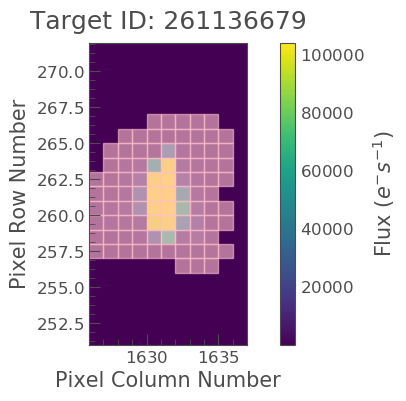

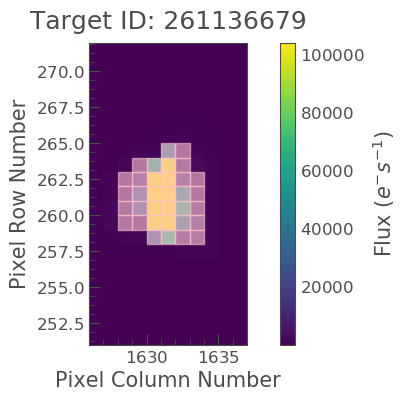

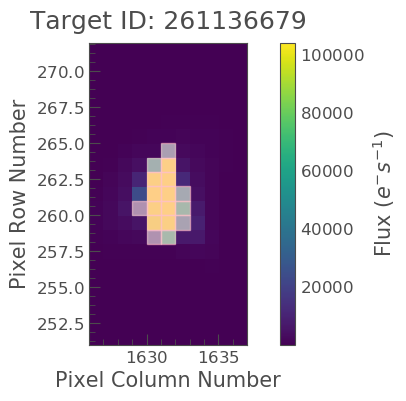

In [6]:
for idx, threshold in enumerate([1, 10, 100]):
    aperture_mask = tpf.create_threshold_mask(threshold=threshold)
    tpf.plot(aperture_mask=aperture_mask)

This looks like a nice diversity of masks.  Let's carry out aperture photometry using each of them, and plot the folded light curve centered on the transiting planet.

In [20]:
lc1 = tpf.to_lightcurve(aperture_mask= tpf.create_threshold_mask(threshold=1))
lc2 = tpf.to_lightcurve(aperture_mask= tpf.create_threshold_mask(threshold=10))
lc3 = tpf.to_lightcurve(aperture_mask= tpf.create_threshold_mask(threshold=100))

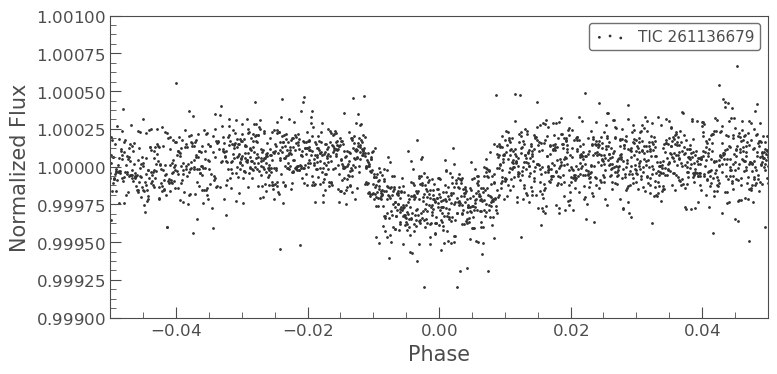

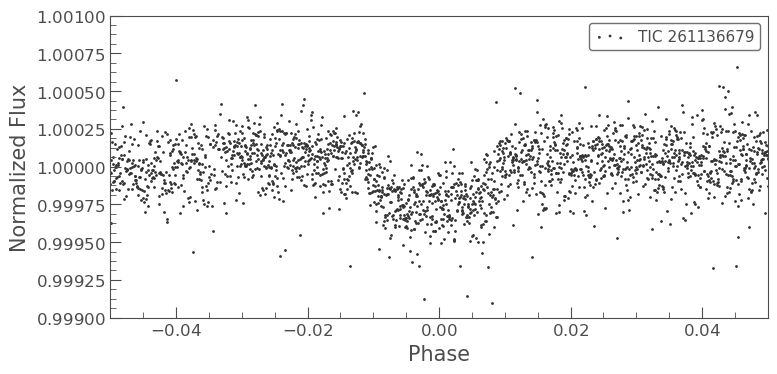

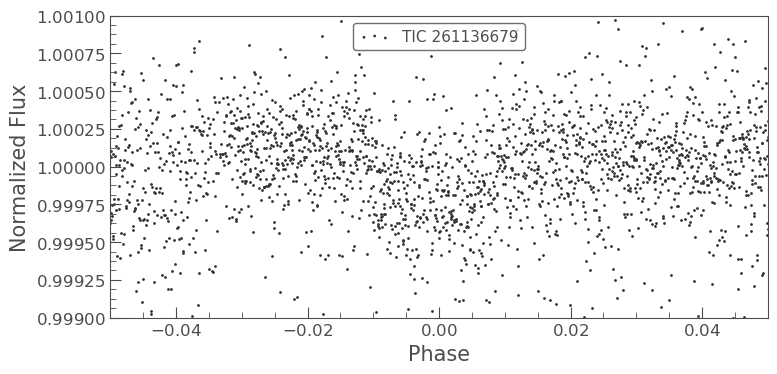

In [21]:
for lc in [lc1, lc2, lc3]:
    ax = lc.flatten(window_length=1001).fold(period=6.27, t0=1325.504).scatter()
    ax.set_xlim([-0.05, +0.05])
    ax.set_ylim([0.999, 1.001])

These plots suggests that the largest mask yielded the best light curve.  Does the CDPP noise metric confirm this?

In [22]:
for lc in [lc1, lc2, lc3]:
    print("CDPP = {:.1f}".format(lc.estimate_cdpp()))

CDPP = 44.9
CDPP = 50.6
CDPP = 117.4


Now let's compare it against the pipeline PDCSAP_FLUX light curve.

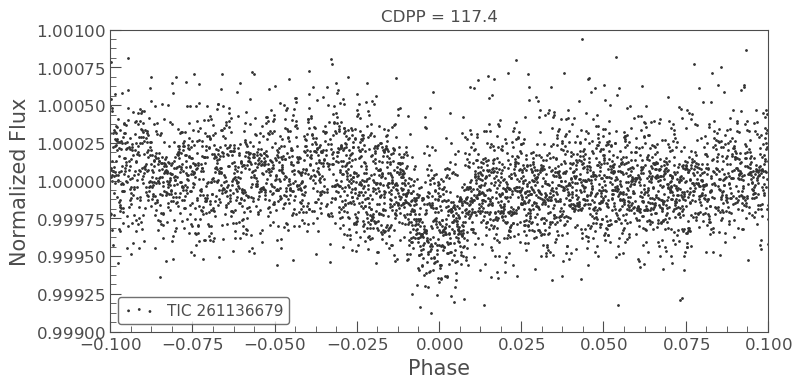

In [23]:
lcf = lk.search_lightcurvefile("Pi Mensae", sector=1).download()
pipeline_lc = lcf.PDCSAP_FLUX
ax = pipeline_lc.fold(period=6.27, t0=1325.504).scatter()
ax.set_title("CDPP = {:.1f}".format(lc.estimate_cdpp()))
ax.set_xlim([-0.1, +0.1])
ax.set_ylim([0.999, 1.001]);

Succcess!  Using a careful manual analysis, we were able to extract a light curve which is slightly better than the automated pipeline light curve.